## BOAKYE DUAH, Kluivert

# Importing libraries

In [1]:
# importing libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.model_selection import train_test_split

#Reading the dataset
df = pd.read_csv(r"dataset.csv\dataset.csv")
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [2]:
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
#from lime import lime_tabular

# Exploratory Data Analysis & Cleaning

In [4]:
# checking the information of each variable
df.info(memory_usage = "deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [5]:
#checking the dimension of the dataframe
df.shape

(91713, 85)

In [6]:
#Random Sampling the dataset
s = 91713//50  # sample size of 2%
skip = sorted(random.sample(range(1, 91713+1), 91713-s))  # n+1 to compensate for header 
df = pd.read_csv(r"dataset.csv\dataset.csv", skiprows=skip)

In [7]:
#A review of the random sample
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,45954,102946,118,39.0,37.010278,1,NaN,M,177.8,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
1,15917,30054,46,56.0,34.154401,0,Caucasian,F,162.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
2,80401,74973,46,48.0,25.968033,0,Caucasian,M,175.3,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0
3,15146,72148,83,69.0,29.557946,0,Caucasian,M,185.4,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,1.0,Cardiovascular,Cardiovascular,NaN,0
4,125370,8831,33,85.0,31.988191,0,Caucasian,M,175.3,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [8]:
#shape of the random sample
df.shape

(1834, 85)

In [9]:
#checking for categorical variables and quantitative variables/numeric
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [10]:
#displaying the results of the categorical and numeric variables
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
dic_cols

{'encounter_id': 'num',
 'patient_id': 'num',
 'hospital_id': 'num',
 'age': 'num',
 'bmi': 'num',
 'elective_surgery': 'cat',
 'ethnicity': 'cat',
 'gender': 'cat',
 'height': 'num',
 'icu_admit_source': 'cat',
 'icu_id': 'num',
 'icu_stay_type': 'cat',
 'icu_type': 'cat',
 'pre_icu_los_days': 'num',
 'weight': 'num',
 'apache_2_diagnosis': 'num',
 'apache_3j_diagnosis': 'num',
 'apache_post_operative': 'cat',
 'arf_apache': 'cat',
 'gcs_eyes_apache': 'cat',
 'gcs_motor_apache': 'cat',
 'gcs_unable_apache': 'cat',
 'gcs_verbal_apache': 'cat',
 'heart_rate_apache': 'num',
 'intubated_apache': 'cat',
 'map_apache': 'num',
 'resprate_apache': 'num',
 'temp_apache': 'num',
 'ventilated_apache': 'cat',
 'd1_diasbp_max': 'num',
 'd1_diasbp_min': 'num',
 'd1_diasbp_noninvasive_max': 'num',
 'd1_diasbp_noninvasive_min': 'num',
 'd1_heartrate_max': 'num',
 'd1_heartrate_min': 'num',
 'd1_mbp_max': 'num',
 'd1_mbp_min': 'num',
 'd1_mbp_noninvasive_max': 'num',
 'd1_mbp_noninvasive_min': 'num',


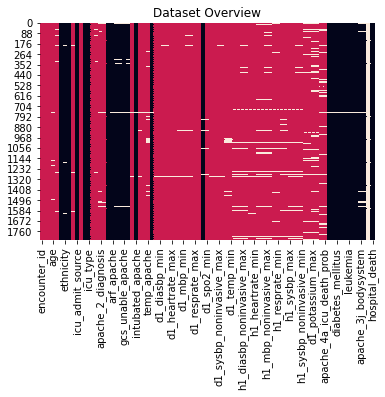

 Categerocial   Numeric   NaN 


In [11]:
# a heatmap to show missing and non-missing observations
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [12]:
# dropping the id columns and the empty column
df.drop(["encounter_id","patient_id","hospital_id","Unnamed: 83","icu_id"], axis = 1, inplace =True)

In [13]:
#checking the shape of the current dataframe
df.shape

(1834, 80)

In [14]:
#summary statistics
df.describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,1753.000000,1770.000000,1834.000000,1805.000000,1834.000000,1790.000000,1799.000000,1807.000000,1834.000000,1820.000000,...,1668.000000,1820.0,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1834.000000
mean,61.749572,28.997209,0.188113,169.702127,0.867281,83.701514,188.001668,565.053226,0.206652,0.024725,...,0.042578,0.0,0.018132,0.210440,0.016484,0.026923,0.008242,0.004396,0.020879,0.087241
std,17.041734,8.210754,0.390909,10.859473,2.463955,25.116816,86.831953,470.675021,0.405014,0.155329,...,0.222508,0.0,0.133465,0.407733,0.127361,0.161903,0.090434,0.066172,0.143019,0.282265
min,16.000000,14.844926,0.000000,137.200000,-10.693750,38.600000,101.000000,0.020000,0.000000,0.000000,...,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,23.593027,0.000000,162.000000,0.032639,66.000000,113.000000,203.010000,0.000000,0.000000,...,0.010000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.469627,0.000000,170.100000,0.131944,79.525000,123.000000,408.020000,0.000000,0.000000,...,0.020000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.548312,0.000000,177.800000,0.415972,97.992500,302.000000,703.030000,0.000000,0.000000,...,0.060000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,28.584028,186.000000,308.000000,2201.050000,1.000000,1.000000,...,0.930000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#the distribution of the dependant variable
label = df["hospital_death"].value_counts()
label

0    1674
1     160
Name: hospital_death, dtype: int64

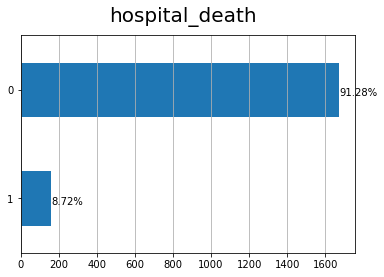

In [16]:
#Plot of the distribution of the dependant varialbe showing percentage of the classes
x= "hospital_death"
ax = df["hospital_death"].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

In [17]:
#Age variable
Age = df["age"]
Age

0       39.0
1       56.0
2       48.0
3       69.0
4       85.0
        ... 
1829    52.0
1830    61.0
1831    73.0
1832    70.0
1833    66.0
Name: age, Length: 1834, dtype: float64

In [18]:
#BMI variable
BMI = df["bmi"]
BMI

0       37.010278
1       34.154401
2       25.968033
3       29.557946
4       31.988191
          ...    
1829    23.951053
1830    20.212950
1831    17.444079
1832    25.558697
1833    21.493498
Name: bmi, Length: 1834, dtype: float64

In [19]:
#Height variable
Height = df["height"]
Height

0       177.8
1       162.6
2       175.3
3       185.4
4       175.3
        ...  
1829    170.1
1830    152.0
1831    167.6
1832    182.9
1833    178.0
Name: height, Length: 1834, dtype: float64

In [20]:
#Weight variable
Weight = df["weight"]
Weight

0       117.0
1        90.3
2        79.8
3       101.6
4        98.3
        ...  
1829     69.3
1830     46.7
1831     49.0
1832     85.5
1833     68.1
Name: weight, Length: 1834, dtype: float64

<AxesSubplot:>

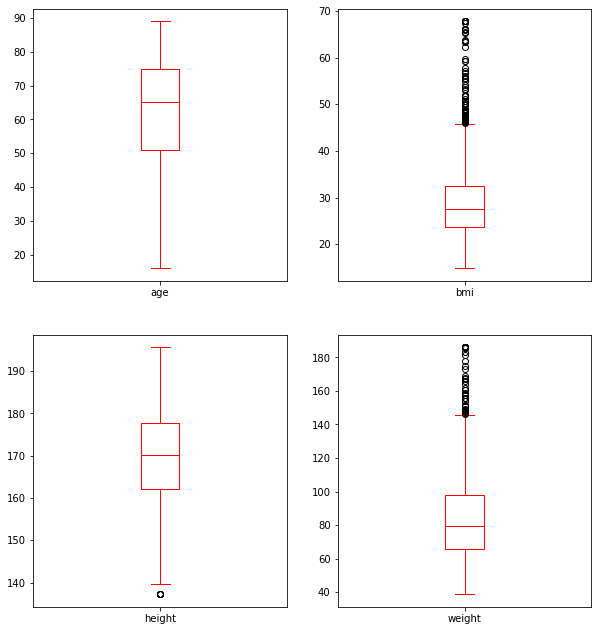

In [21]:
#Box-plot of the age, height, weight and the bmi variable
%matplotlib inline
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows =2 , ncols =2, figsize =[10,11])
Age.plot(kind ="box", color ="r" , ax=ax1)
BMI.plot(kind = "box", color = "r",ax=ax2)
Height.plot(kind = "box", color = "r", ax=ax3)
Weight.plot(kind = "box", color = "r",ax=ax4)

<AxesSubplot:>

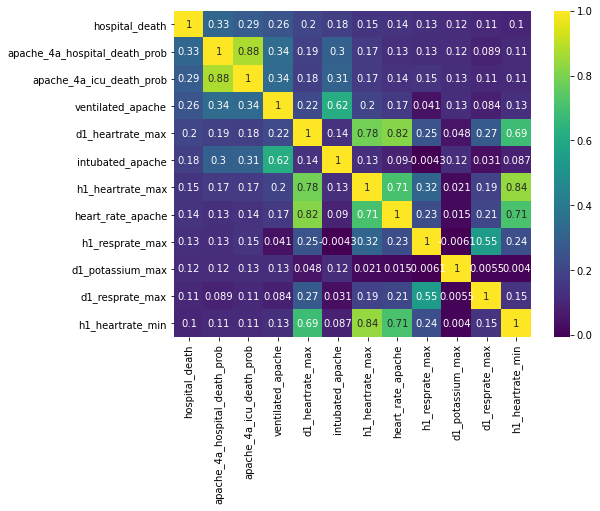

In [22]:
#Heat map for correlation between variables
k = 12
cols = df.corr().nlargest(k, 'hospital_death')['hospital_death'].index
cm = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

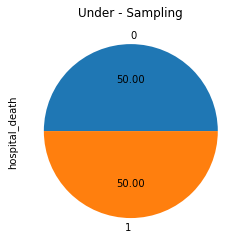

In [23]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(df.drop("hospital_death",axis=1),df["hospital_death"])
ax = y_res.value_counts().plot.pie(autopct = "%.2f")
_=ax.set_title("Under - Sampling")

In [24]:
#Current class distribution
y_res.value_counts()

0    160
1    160
Name: hospital_death, dtype: int64

In [25]:
#concatinating the x and y samples together
df_new = pd.concat([X_res,y_res], axis=1)
df_new.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,67.0,44.830859,0,Caucasian,F,165.1,Operating Room / Recovery,admit,Med-Surg ICU,0.404167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
1,70.0,33.519700,1,Caucasian,M,170.2,Operating Room / Recovery,admit,SICU,0.254167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary,0
2,29.0,26.106562,0,Caucasian,F,159.0,Accident & Emergency,admit,Med-Surg ICU,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary,0
3,59.0,46.953125,1,Caucasian,F,160.0,Operating Room / Recovery,admit,Med-Surg ICU,0.497917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal,0
4,38.0,29.653979,0,African American,F,170.0,Accident & Emergency,admit,Med-Surg ICU,0.331944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [26]:
##checking the number of missing values in each variable
df_new.isnull().sum()

age                            18
bmi                             8
elective_surgery                0
ethnicity                       2
gender                          0
                               ..
lymphoma                        3
solid_tumor_with_metastasis     3
apache_3j_bodysystem            7
apache_2_bodysystem             7
hospital_death                  0
Length: 80, dtype: int64

In [27]:
## Percentage of missing values
missing_percentage = df_new.isnull().sum() / df_new.shape[0] * 100.00
missing_percentage

age                            5.6250
bmi                            2.5000
elective_surgery               0.0000
ethnicity                      0.6250
gender                         0.0000
                                ...  
lymphoma                       0.9375
solid_tumor_with_metastasis    0.9375
apache_3j_bodysystem           2.1875
apache_2_bodysystem            2.1875
hospital_death                 0.0000
Length: 80, dtype: float64

In [28]:
#dropping the missing values in the training dataset
df_new = df_new.dropna()

In [29]:
##checking the missing values after dropping them
df_new.isnull().sum()

age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 80, dtype: int64

In [30]:
##checking the groups in the variable ethnicity
df_new["ethnicity"].value_counts()

Caucasian           168
African American     14
Other/Unknown         7
Hispanic              5
Native American       2
Asian                 1
Name: ethnicity, dtype: int64

In [31]:
#setting dummy variables
## create dummy for ethnicity
dummy_ethnic = pd.get_dummies(df_new["ethnicity"], 
                       prefix="ethnicity",drop_first=True)
df_new= pd.concat([df_new, dummy_ethnic], axis=1)
print( df_new.filter(like="ethnicity",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("ethnicity", axis=1)


   ethnicity  ethnicity_Asian  ethnicity_Caucasian  ethnicity_Hispanic  \
0  Caucasian                0                    1                   0   
1  Caucasian                0                    1                   0   
2  Caucasian                0                    1                   0   
3  Caucasian                0                    1                   0   
5  Caucasian                0                    1                   0   

   ethnicity_Native American  ethnicity_Other/Unknown  
0                          0                        0  
1                          0                        0  
2                          0                        0  
3                          0                        0  
5                          0                        0  


In [32]:
## create dummy for gender
dummy_gender = pd.get_dummies(df_new["gender"], 
                       prefix="gender",drop_first=True)
df_new= pd.concat([df_new, dummy_gender], axis=1)
print( df_new.filter(like="gender",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("gender", axis=1)

  gender  gender_M
0      F         0
1      M         1
2      F         0
3      F         0
5      F         0


In [33]:
## create dummy for icu stay type
dummy_icu_stay_type = pd.get_dummies(df_new["icu_stay_type"], 
                       prefix="icu_stay_type",drop_first=True)
df_new= pd.concat([df_new, dummy_icu_stay_type], axis=1)
print( df_new.filter(like="icu_stay_type",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("icu_stay_type", axis=1)

  icu_stay_type  icu_stay_type_readmit  icu_stay_type_transfer
0         admit                      0                       0
1         admit                      0                       0
2         admit                      0                       0
3         admit                      0                       0
5         admit                      0                       0


In [34]:
## create dummy for icu type
dummy_icu_type  = pd.get_dummies(df_new["icu_type"], 
                       prefix="icu_type",drop_first=True)
df_new= pd.concat([df_new, dummy_icu_type ], axis=1)
print( df_new.filter(like="icu_type",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("icu_type", axis=1)

       icu_type  icu_type_CSICU  icu_type_CTICU  icu_type_Cardiac ICU  \
0  Med-Surg ICU               0               0                     0   
1          SICU               0               0                     0   
2  Med-Surg ICU               0               0                     0   
3  Med-Surg ICU               0               0                     0   
5         CSICU               1               0                     0   

   icu_type_MICU  icu_type_Med-Surg ICU  icu_type_Neuro ICU  icu_type_SICU  
0              0                      1                   0              0  
1              0                      0                   0              1  
2              0                      1                   0              0  
3              0                      1                   0              0  
5              0                      0                   0              0  


In [35]:
## create dummy for icu admit source
dummy_icu_admit_source   = pd.get_dummies(df_new["icu_admit_source"], 
                       prefix="icu_admit_source",drop_first=True)
df_new= pd.concat([df_new, dummy_icu_admit_source  ], axis=1)
print( df_new.filter(like="icu_admit_source",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("icu_admit_source", axis=1)

            icu_admit_source  icu_admit_source_Floor  \
0  Operating Room / Recovery                       0   
1  Operating Room / Recovery                       0   
2       Accident & Emergency                       0   
3  Operating Room / Recovery                       0   
5  Operating Room / Recovery                       0   

   icu_admit_source_Operating Room / Recovery  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
5                                           1   

   icu_admit_source_Other Hospital  icu_admit_source_Other ICU  
0                                0                           0  
1                                0                           0  
2                                0                           0  
3                                0                           0  
5                                0         

In [36]:
## create dummy for apache 3j bodysystem
dummy_apache_3j_bodysystem = pd.get_dummies(df_new["apache_3j_bodysystem"], 
                       prefix="apache_3j_bodysystem",drop_first=True)
df_new= pd.concat([df_new, dummy_apache_3j_bodysystem], axis=1)
print( df_new.filter(like="apache_3j_bodysystem",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("apache_3j_bodysystem", axis=1)

  apache_3j_bodysystem  apache_3j_bodysystem_Gastrointestinal  \
0       Cardiovascular                                      0   
1        Genitourinary                                      0   
2        Genitourinary                                      0   
3     Gastrointestinal                                      1   
5       Cardiovascular                                      0   

   apache_3j_bodysystem_Genitourinary  apache_3j_bodysystem_Hematological  \
0                                   0                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   0                                   0   
5                                   0                                   0   

   apache_3j_bodysystem_Metabolic  apache_3j_bodysystem_Musculoskeletal/Skin  \
0                               0                                 

In [37]:
## create dummy for apache 2 bodysystem
dummy_apache_2_bodysystem = pd.get_dummies(df_new["apache_2_bodysystem"], 
                       prefix="apache_2_bodysystem",drop_first=True)
df_new= pd.concat([df_new, dummy_apache_2_bodysystem], axis=1)
print( df_new.filter(like="apache_2_bodysystem",axis=1).head() )
## drop the original categorical column
df_new = df_new.drop("apache_2_bodysystem", axis=1)

   apache_2_bodysystem  apache_2_bodysystem_Gastrointestinal  \
0       Cardiovascular                                     0   
1  Renal/Genitourinary                                     0   
2  Renal/Genitourinary                                     0   
3     Gastrointestinal                                     1   
5       Cardiovascular                                     0   

   apache_2_bodysystem_Haematologic  apache_2_bodysystem_Metabolic  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
5                                 0                              0   

   apache_2_bodysystem_Neurologic  apache_2_bodysystem_Renal/Genitourinary  \
0                               0                                        0   
1                               0     

# Feature Scaling

In [38]:

## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(df_new.drop("hospital_death", axis=1))
df_scaled= pd.DataFrame(X, columns=df_new.drop("hospital_death", 
                        axis=1).columns, index=df_new.index)
df_scaled.head()
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
df_scaled["hospital_death"] = scalerY.fit_transform(
                   df_new["hospital_death"].values.reshape(-1,1))
df_scaled.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,hospital_death
0,0.000000,1.812881,0.0,-0.328947,0.394995,1.242690,0.029703,-1.027027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.166667,0.662788,1.0,0.006579,0.159956,0.508772,1.000000,4.361554,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
2,-2.111111,-0.090963,0.0,-0.730263,0.075082,-0.400585,1.891089,1.662162,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
3,-0.444444,2.028668,1.0,-0.664474,0.541893,1.184211,0.990099,3.358108,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
5,-0.500000,0.910044,1.0,-1.164474,0.260065,0.111111,0.881188,2.709527,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [39]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(df_new.drop("hospital_death", axis=1))
df_scaled= pd.DataFrame(X, columns=df_new.drop("hospital_death", 
                        axis=1).columns, index=df_new.index)
df_scaled = pd.concat([df_scaled,df_new["hospital_death"]],axis=1)
df_scaled.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,hospital_death
0,0.000000,1.812881,0.0,-0.328947,0.394995,1.242690,0.029703,-1.027027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.166667,0.662788,1.0,0.006579,0.159956,0.508772,1.000000,4.361554,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,-2.111111,-0.090963,0.0,-0.730263,0.075082,-0.400585,1.891089,1.662162,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,-0.444444,2.028668,1.0,-0.664474,0.541893,1.184211,0.990099,3.358108,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,-0.500000,0.910044,1.0,-1.164474,0.260065,0.111111,0.881188,2.709527,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
#the shape of the scaled dataframe
df_scaled.shape

(197, 110)

In [41]:
# the explanatory variables of the scaled data
dfx_scaled = df_scaled.drop("hospital_death", axis=1)
dfx_scaled.keys()

Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache',
       ...
       'apache_3j_bodysystem_Trauma', 'apache_2_bodysystem_Gastrointestinal',
       'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object', length=109)

# Feature Importance

In [42]:
#Feature Importance
from sklearn.ensemble import RandomForestClassifier
X = df_scaled.iloc[:,0:110]
Y = df_scaled.iloc[:,-1]
names = df_scaled.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.2963, 'hospital_death'), (0.0721, 'apache_4a_icu_death_prob'), (0.0556, 'apache_4a_hospital_death_prob'), (0.036, 'd1_sysbp_noninvasive_min'), (0.0307, 'd1_sysbp_min'), (0.0275, 'd1_temp_min'), (0.0265, 'd1_mbp_min'), (0.0223, 'd1_mbp_noninvasive_min'), (0.017, 'h1_sysbp_noninvasive_min'), (0.0168, 'temp_apache'), (0.0146, 'd1_diasbp_min'), (0.014, 'd1_diasbp_noninvasive_min'), (0.0131, 'map_apache'), (0.0126, 'h1_sysbp_min'), (0.0126, 'd1_heartrate_max'), (0.0123, 'd1_resprate_max'), (0.012, 'height'), (0.0115, 'h1_mbp_min'), (0.0107, 'h1_diasbp_noninvasive_min'), (0.01, 'apache_2_diagnosis'), (0.0097, 'h1_heartrate_min'), (0.0097, 'h1_diasbp_noninvasive_max'), (0.0096, 'weight'), (0.0094, 'h1_heartrate_max'), (0.0089, 'h1_mbp_noninvasive_min'), (0.0089, 'h1_diasbp_max'), (0.0085, 'd1_spo2_min'), (0.0084, 'age'), (0.0083, 'apache_post_operative'), (0.008, 'd1_potassium_max'), (0.0079, 'd1_potassium_min'), (0.0073, 'heart_rate_apache'), (0.0072, 'apa

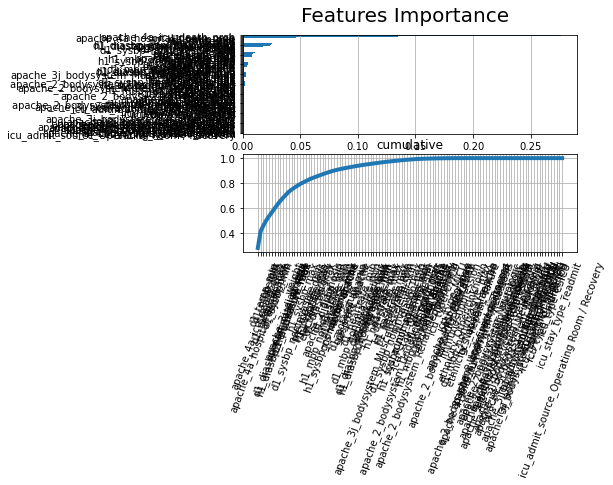

In [43]:
#Feature importance plot
import numpy as np
X = df_scaled.drop("hospital_death", axis=1).values
y = df_scaled["hospital_death"].values
feature_names = df_scaled.drop("hospital_death", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
#importance
## Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
df_importances['cumsum'] =  df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
df_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(df_importances)), 
          xticklabels=df_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

# Principal Component Analysis

In [44]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(dfx_scaled)
x_pca = pca.transform(dfx_scaled)

In [45]:
#the shape of the x_pca
x_pca.shape

(197, 30)

In [46]:
# the explained variance ratio of the pca
pca.explained_variance_ratio_

array([0.32960505, 0.13218601, 0.08574537, 0.06015807, 0.04239102,
       0.03395064, 0.03030049, 0.0246273 , 0.02105182, 0.01903408,
       0.01774618, 0.01754718, 0.01597715, 0.01486673, 0.01223793,
       0.01189657, 0.01124412, 0.00906897, 0.00831667, 0.00760458,
       0.00667793, 0.00634171, 0.00573558, 0.00482965, 0.00463103,
       0.0043204 , 0.00420338, 0.00372786, 0.00337423, 0.0031717 ])

In [47]:
#the explained variance ratio into percentage
per_var = np.round(pca.explained_variance_ratio_*100,decimals =1)
labels = ["PCA" + str(x) for x in range(1, len(per_var) +1)]

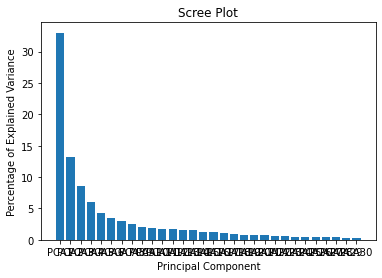

In [48]:
#Scree plot
plt.bar(x = range(1, len(per_var) +1), height = per_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

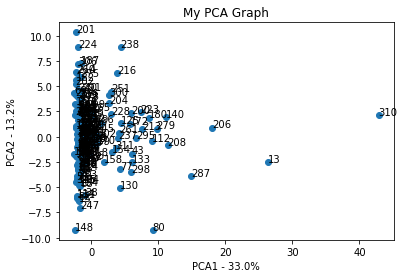

In [49]:
pca_df = pd.DataFrame(x_pca, index = df_new.index, columns = labels)
plt.scatter(pca_df.PCA1,pca_df.PCA2)
plt.title("My PCA Graph")
plt.xlabel("PCA1 - {0}%".format(per_var[0]))
plt.ylabel("PCA2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PCA1.loc[sample], pca_df.PCA2.loc[sample]))
plt.show()

# Model Building


In [51]:
#Data partition
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, df_scaled["hospital_death"], test_size=0.2,random_state = 105)

# Logistic Regression

In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression(max_iter=1000)

#Fitting the model
Logmodel.fit(X_train_pca,y_train)
y_pred = Logmodel.predict(X_test_pca)

#The prediction
print(y_pred)



[1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1
 0 1 0]


In [53]:
#Confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[13,  2],
       [ 4, 21]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

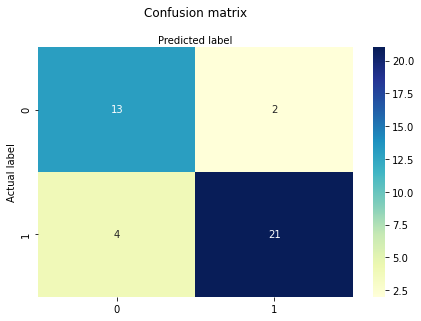

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.85
Precision: 0.9130434782608695
Recall: 0.84


# Support Vector Machine

In [56]:
#Support Vector Machine
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)

In [57]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[14,  1],
       [ 4, 21]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

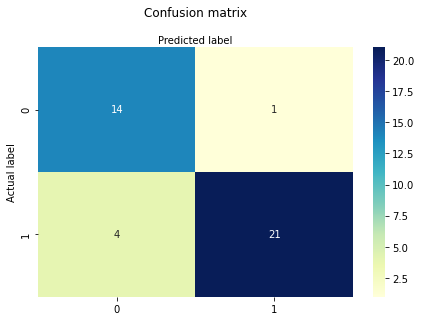

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.875
Precision: 0.9545454545454546
Recall: 0.84


# Naive Bayes

In [60]:
#Naive Bayes
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train_pca,y_train)

#Predict Output
predicted= model.predict(X_test_pca) # 0:Overcast, 2:Mild
print ("Predicted Value:", predicted)

Predicted Value: [1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 0]


In [61]:
#Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test,predicted)
conf_matrix

array([[13,  2],
       [ 4, 21]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

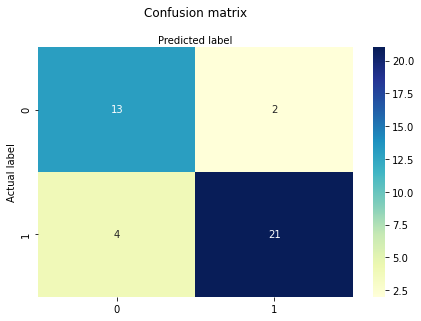

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, predicted))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, predicted))

Accuracy: 0.85
Precision: 0.9130434782608695
Recall: 0.84


# Model Comparison

LR: 0.680833 (0.060415)
NB: 0.641667 (0.083271)
SVM: 0.700000 (0.078462)


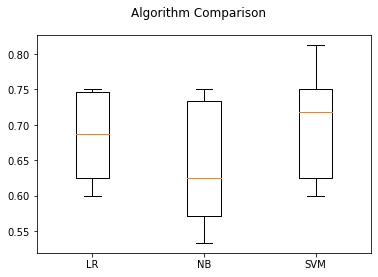

In [64]:
seed = 20
models = []
models.append(('LR', Logmodel))
models.append(('NB', model))
models.append(('SVM', clf))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model,X_train_pca,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()